In [220]:
library(readr)

In [255]:
GAZP <- read.table("GAZP.csv",header=TRUE,sep=';',row.names = 1)
head(GAZP)

,GAZP
,<dbl>
02/05/20,232.56
02/06/20,231.38
02/07/20,229.11
02/10/20,225.20
02/11/20,233.90
02/12/20,238.03


In [221]:
asset <- read.table("SNGS.csv",header=TRUE,sep=';',row.names = 1)
head(asset)

,SNGS
,<dbl>
02/05/2020,46.875
02/06/2020,46.965
02/07/2020,46.125
02/10/2020,46.220
02/11/2020,47.725
02/12/2020,49.000


In [222]:
imoex <- read.table("IMOEX.csv",header=TRUE,sep=';',row.names = 1)
head(imoex)

,IMOEX
,<dbl>
02/05/2020,3114.25
02/06/2020,3096.68
02/07/2020,3087.63
02/10/2020,3062.41
02/11/2020,3097.58
02/12/2020,3122.27


Графики стоимотей по времени "Сургут нефть газа" и IMOEX



In [223]:
install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [224]:
install.packages("anytime")   # Install anytime package
library("anytime")            # Load anytime

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



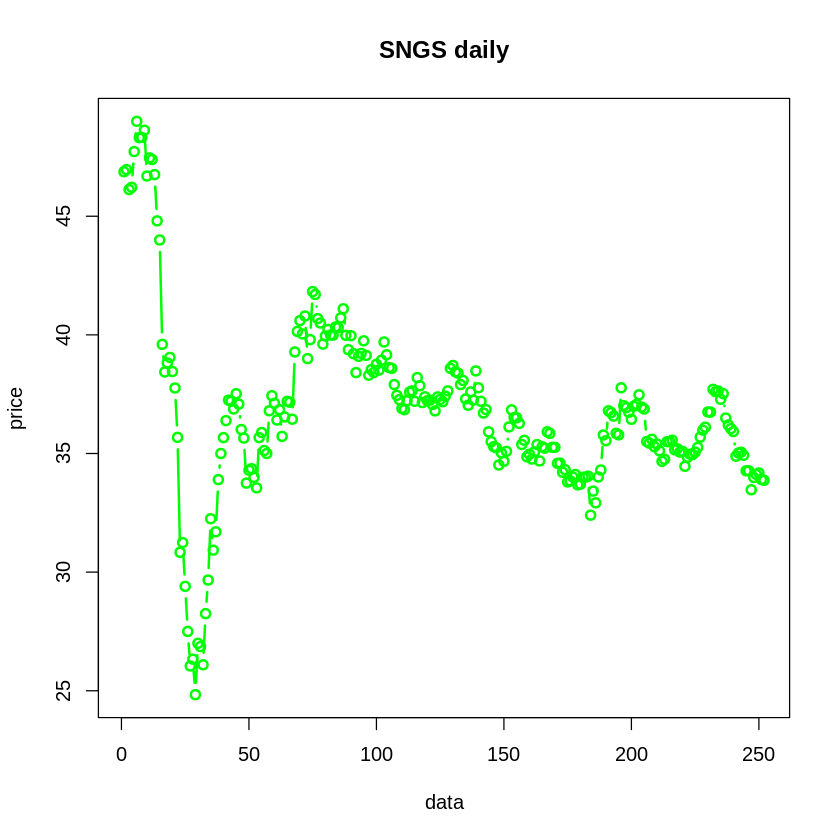

In [225]:
colnames(asset)<- c("SNGS")
plot(asset$SNGS,type = 'b',main="SNGS daily",pch = 21, col = "green",lwd = 2,xlab= 'data',ylab = "price" )

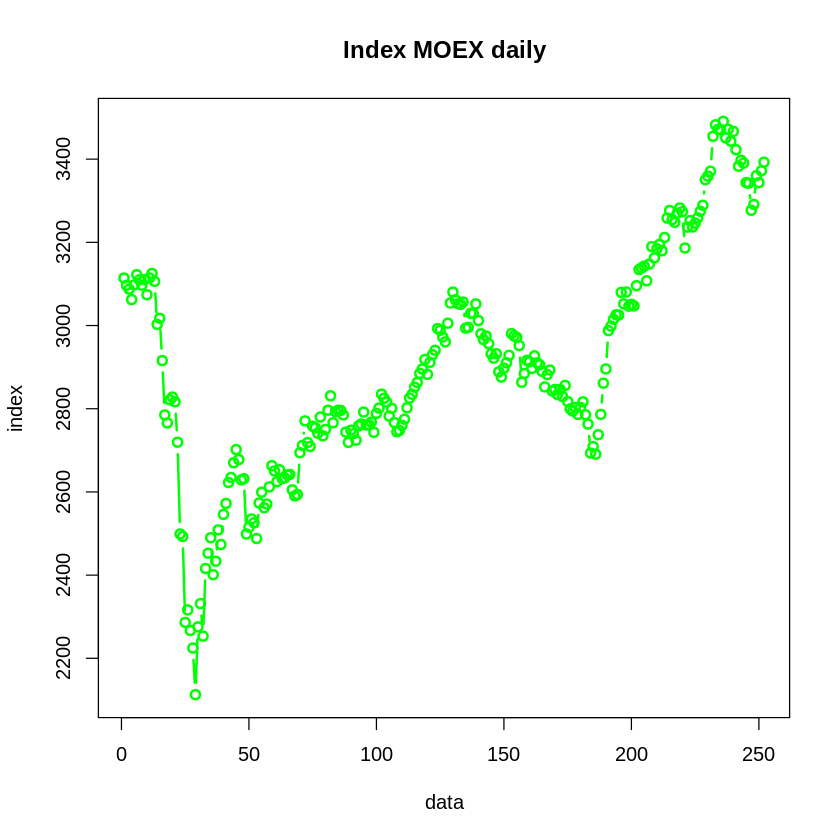

In [226]:
colnames(imoex)<- c("IMOEX")
plot(imoex$IMOEX,type = 'b',main="Index MOEX daily",pch = 21, col = "green",lwd = 2,xlab= 'data',ylab = "index" )

Переходим к логарифмическим доходностям

In [227]:
Rf <- 0.04

len<- dim(asset)[1]
r1 <- diff(log(asset$SNGS))
r2 <- diff(log(imoex$IMOEX))
rates <- cbind(r1,r2)

colnames(rates)<- c("SNGS","IMOEX")
rownames(rates)<-as.character(as.Date(rownames(asset)[2:len],"%m/%d/%Y"))
head(rates)

,SNGS,IMOEX
2020-02-06,0.001918159,-0.005657783
2020-02-07,-0.018047541,-0.002926764
2020-02-10,0.002057502,-0.008201619
2020-02-11,0.032042765,0.011418974
2020-02-12,0.026364928,0.007939140
2020-02-13,-0.014181720,-0.003921498


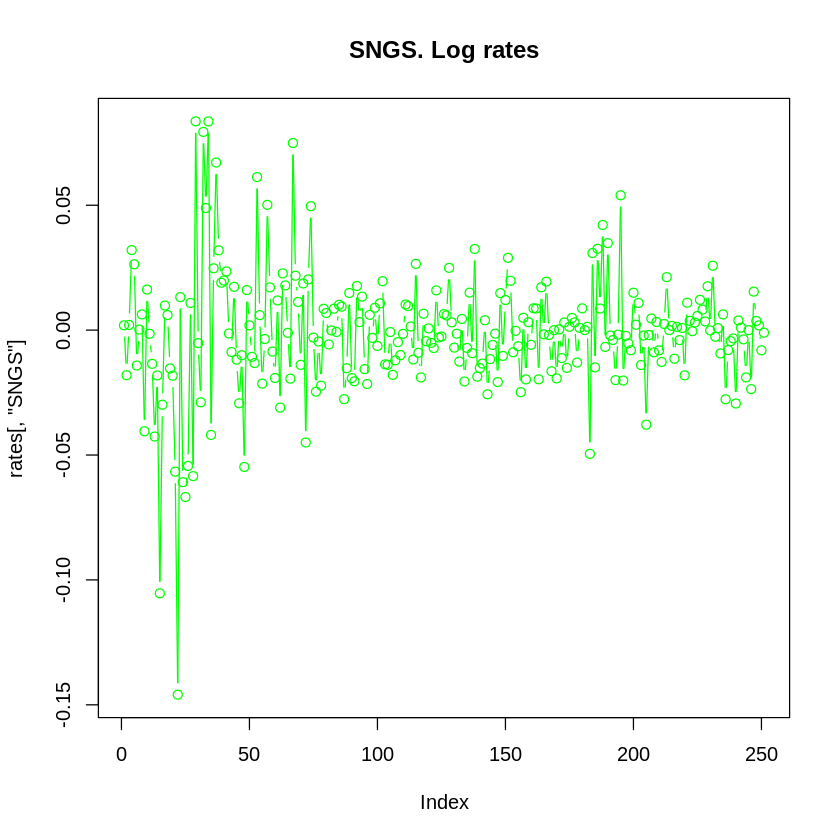

In [228]:
plot(rates[,'SNGS'],main= 'SNGS. Log rates',type ='b',pch =21,col = 'green')

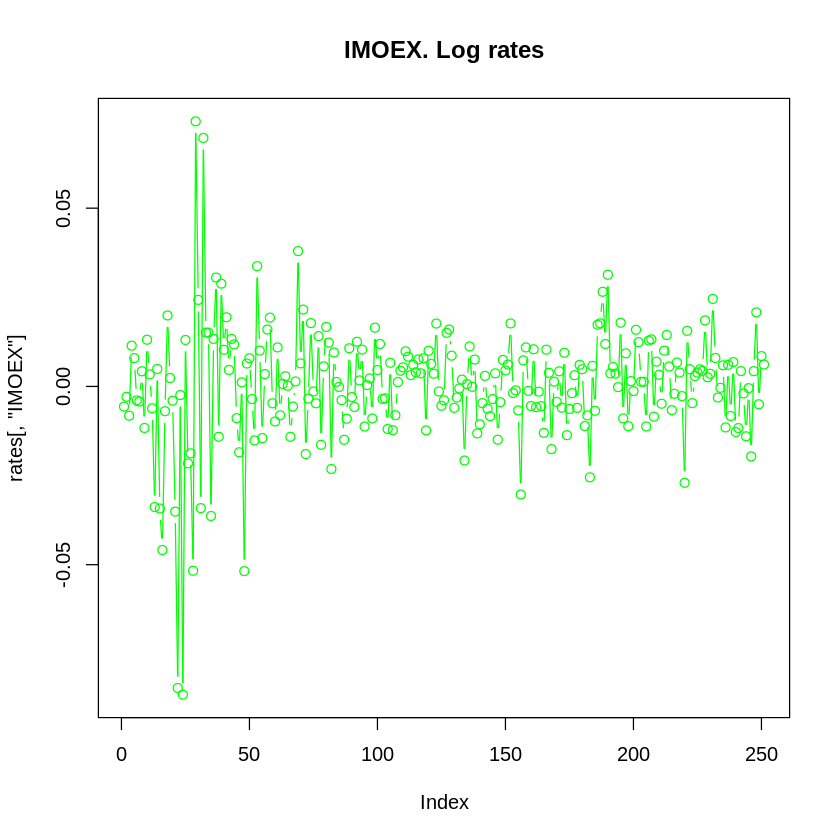

In [229]:
plot(rates[,'IMOEX'],main= 'IMOEX. Log rates',type ='b',pch =21,col = 'green')

In [256]:
len<- dim(GAZP)[1]
r1 <- diff(log(GAZP$GAZP))
r2 <- diff(log(imoex$IMOEX))
G_rates <- cbind(r1,r2)

colnames(G_rates)<- c("GAZP","IMOEX")
rownames(G_rates)<-as.character(as.Date(rownames(GAZP)[2:len],"%m/%d/%Y"))
head(G_rates)

,GAZP,IMOEX
20-02-06,-0.005086876,-0.005657783
20-02-07,-0.009859143,-0.002926764
20-02-10,-0.017213341,-0.008201619
20-02-11,0.037904777,0.011418974
20-02-12,0.017503043,0.007939140
20-02-13,-0.019000529,-0.003921498


Коэффициент $\beta$

In [230]:
beta_manual <- cov(rates[, "SNGS"],rates[, "IMOEX"])/ var(rates[, "IMOEX"])
beta_manual

[1] 1.115865

In [231]:
beta <- CAPM.beta(rates[, "SNGS"],rates[, "IMOEX"])
beta

[1] 1.115865

In [257]:
beta <- CAPM.beta(G_rates[, "GAZP"],G_rates[, "IMOEX"])
beta

[1] 0.9014238

Значение не совпадает с примером

Коэффициент $\alpha$

In [232]:
(alpha_manual <- mean(rates[, "SNGS"])-Rf- beta*(mean(rates[, "IMOEX"])- Rf))

[1] 0.002959218

In [233]:
(alpha <- CAPM.alpha(rates[, "SNGS"],rates[, "IMOEX"],Rf = 0.04))

[1] 0.002959218

In [258]:
(alpha <- CAPM.alpha(G_rates[, "GAZP"],G_rates[, "IMOEX"],Rf = 0.04))

[1] -0.004435597

Шарпа

In [234]:
mean(rates[, "SNGS"]-Rf)/sd(rates[, "SNGS"]-Rf)

[1] -1.656965

In [235]:
SharpeRatio(rates[, "SNGS"], Rf = Rf, p = 0.95, FUN = c("StdDev"))

"StdDev Sharpe (Rf=4%, p=95%):",-1.656965


In [259]:
mean(G_rates[, "GAZP"]-Rf)/sd(G_rates[, "GAZP"]-Rf)

[1] -2.108102

VAR арифметическая

In [275]:
 dif <- diff(asset$SNGS)
 mean_dif <- mean(dif)

 vol <- sd(dif)

In [276]:
 alpha = 0.95
(VAR1 = qnorm(1-alpha,mean=mean_dif,sd=1)*vol)

[1] -1.48076

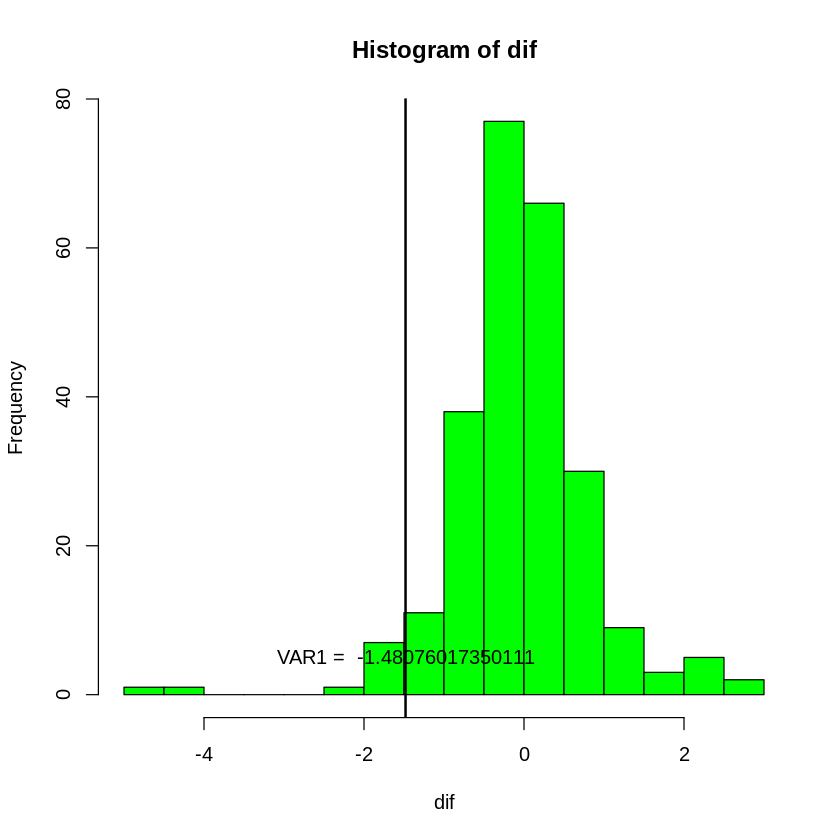

In [277]:
hist(dif,col = "green",nclass = 20)
abline(v = VAR1,lwd = 2)
text(VAR1,5,paste("VAR1 = ",VAR1))

VAR историческая

In [278]:
library(PerformanceAnalytics)
  data_dif <- as.xts(dif, order.by = as.Date(rownames(asset)[2:len],"%m/%d/%Y"))
  head(data_dif)

             [,1]
2020-02-06  0.090
2020-02-07 -0.840
2020-02-10  0.095
2020-02-11  1.505
2020-02-12  1.275
2020-02-13 -0.690

In [279]:
(VaR(data_dif, p=.95, method="historical"))

VaR calculation produces unreliable result (risk over 100%) for column: 1 : 1.3475



VaR,-1


In [280]:
(-1*quantile(data_dif,c(.05,.95)))

5%     95% 
 1.3475 -1.2675

In [281]:
 Gdif <- diff(GAZP$GAZP)
 Gmean_dif <- mean(Gdif)

 Gvol <- sd(Gdif)

In [282]:
 alpha = 0.95
(VAR1 = qnorm(1-alpha,mean=Gmean_dif,sd=1)*Gvol)

[1] -6.146612

In [283]:
Gdata_dif <- as.xts(Gdif, order.by = as.Date(rownames(GAZP)[2:len],"%m/%d/%Y"))
  head(Gdata_dif)

          [,1]
20-02-06 -1.18
20-02-07 -2.27
20-02-10 -3.91
20-02-11  8.70
20-02-12  4.13
20-02-13 -4.48

In [284]:
(-1*quantile(Gdata_dif,c(.05,.95)))

5%   95% 
 5.55 -5.29

$Shortfall_\alpha$

In [243]:
ES(rates, p=.95, method="gaussian")

,SNGS,IMOEX
ES,-0.05259877,-0.03396377


In [244]:
ES(rates, p=.95, method="historical")

,SNGS,IMOEX
ES,-0.06329198,-0.04438307


In [260]:
ES(G_rates, p=.95, method="gaussian")

,GAZP,IMOEX
ES,-0.03942631,-0.03396377


In [261]:
ES(G_rates, p=.95, method="historical")

,GAZP,IMOEX
ES,-0.04743915,-0.04438307
